In [97]:
import numpy as np
import pandas as pd

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
sns.set_style('whitegrid')

In [100]:
df_train = pd.read_csv(r"D:\texi fare predictions\TaxiFare.csv", nrows=40000, parse_dates=["date_time_of_pickup"])

In [101]:
df_train.head(10)

unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1   52:16.0    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2   35:00.0     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3   30:42.0     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4   51:00.0     5.3 2010-03-09 07:51:00+00:00           -73.968095   
5   50:45.0    12.1 2011-01-06 09:50:45+00:00           -74.000964   
6   35:00.0     7.5 2012-11-20 20:35:00+00:00           -73.980002   
7   22:00.0    16.5 2012-01-04 17:22:00+00:00           -73.951300   
8   10:00.0     9.0 2012-12-03 13:10:00+00:00           -74.006462   
9   11:00.0     8.9 2009-09-02 01:11:00+00:00           -73.980658   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   
5           40.731630            -73.972892            40.758233   
6           40.751662            -73.973802            40.764842   
7           40.774138            -73.990095            40.751048   
8           40.726713            -73.993078            40.731628   
9           40.733873            -73.991540            40.758138   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1  
5                1  
6                1  
7                1  
8                1  
9                2

In [102]:
df_train.shape

(40000, 8)

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             40000 non-null  object             
 1   amount                40000 non-null  float64            
 2   date_time_of_pickup   40000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   40000 non-null  float64            
 4   latitude_of_pickup    40000 non-null  float64            
 5   longitude_of_dropoff  40000 non-null  float64            
 6   latitude_of_dropoff   40000 non-null  float64            
 7   no_of_passenger       40000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 2.4+ MB


In [104]:
df_train.describe()

amount  longitude_of_pickup  latitude_of_pickup  \
count  40000.000000         40000.000000        40000.000000   
mean      11.349100           -72.509747           39.932891   
std        9.634925            10.403879            6.315765   
min       -3.000000           -75.414728          -74.006893   
25%        6.000000           -73.992060           40.734847   
50%        8.500000           -73.981744           40.752705   
75%       12.500000           -73.967090           40.767346   
max      200.000000            40.783472          401.083332   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  
count          40000.000000         40000.000000     40000.000000  
mean             -72.498153            39.920173         1.663300  
std               10.439964             6.065730         1.284104  
min              -84.654241           -74.006377         0.000000  
25%              -73.991172            40.734332         1.000000  
50%              -73.980199            40.753341         1.000000  
75%              -73.963766            40.768155         2.000000  
max               40.851027            43.415190         6.000000

In [105]:
df_train.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [106]:
df_train = df_train[df_train["amount"] >= 0]

In [107]:
len(df_train)

39995

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


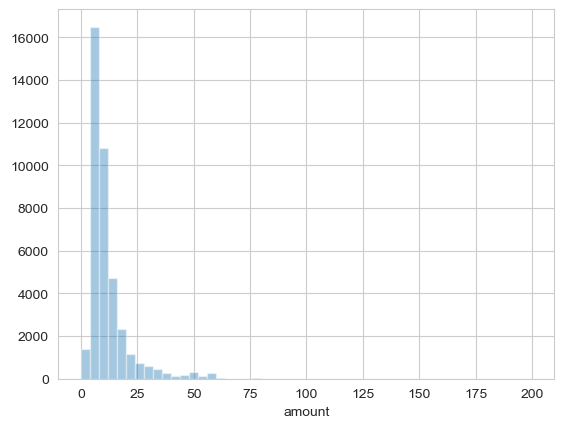

In [108]:
sns.distplot(df_train["amount"], kde=False);

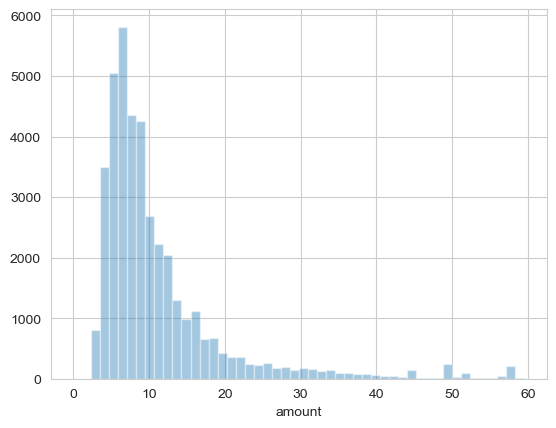

In [109]:
sns.distplot(df_train[df_train["amount"] < 60]["amount"], kde=False);

In [110]:
print(df_train.isnull().sum())

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64


In [111]:
df_train = df_train.dropna(how='any', axis='rows')

In [112]:
len(df_train)

39995

In [113]:
df_test = pd.read_csv(r"D:\texi fare predictions\test.csv")

In [114]:
df_test.head(10)

unique_id      date_time_of_pickup  longitude_of_pickup  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC           -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC           -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC           -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC           -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC           -73.966046   
5  2012-12-01 21:12:12.0000005  2012-12-01 21:12:12 UTC           -73.960983   
6  2011-10-06 12:10:20.0000001  2011-10-06 12:10:20 UTC           -73.949013   
7  2011-10-06 12:10:20.0000003  2011-10-06 12:10:20 UTC           -73.777282   
8  2011-10-06 12:10:20.0000002  2011-10-06 12:10:20 UTC           -74.014099   
9  2014-02-18 15:22:20.0000002  2014-02-18 15:22:20 UTC           -73.969582   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.763805            -73.981430            40.743835   
1           40.719383            -73.998886            40.739201   
2           40.751260            -73.979654            40.746139   
3           40.767807            -73.990448            40.751635   
4           40.789775            -73.988565            40.744427   
5           40.765547            -73.979177            40.740053   
6           40.773204            -73.959622            40.770893   
7           40.646636            -73.985083            40.759368   
8           40.709638            -73.995106            40.741365   
9           40.765519            -73.980686            40.770725   

   no_of_passenger  
0                1  
1                1  
2                1  
3                1  
4                1  
5                1  
6                1  
7                1  
8                1  
9                1

In [115]:
df_test.describe()

longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
count          9914.000000         9914.000000           9914.000000   
mean            -73.974722           40.751041            -73.973657   
std               0.042774            0.033541              0.039072   
min             -74.252193           40.573143            -74.263242   
25%             -73.992501           40.736125            -73.991247   
50%             -73.982326           40.753051            -73.980015   
75%             -73.968013           40.767113            -73.964059   
max             -72.986532           41.709555            -72.990963   

       latitude_of_dropoff  no_of_passenger  
count          9914.000000      9914.000000  
mean             40.751743         1.671273  
std               0.035435         1.278747  
min              40.568973         1.000000  
25%              40.735254         1.000000  
50%              40.754065         1.000000  
75%              40.768757         2.000000  
max              41.696683         6.000000

In [116]:
latitude =  40.7141667
longitude =  -74.0063889

In [117]:
print(min(df_test["longitude_of_pickup"].min(), df_test["longitude_of_dropoff"].min()))

-74.263242


In [118]:
print(max(df_test["longitude_of_pickup"].max(), df_test["longitude_of_dropoff"].max()))

-72.986532


In [119]:
print(min(df_train["longitude_of_pickup"].min(), df_train["longitude_of_dropoff"].min()))

-84.654241


In [120]:
print(max(df_train["longitude_of_pickup"].max(), df_train["longitude_of_dropoff"].max()))

40.851027


In [121]:
print(min(df_test["latitude_of_pickup"].min(), df_test["latitude_of_dropoff"].min()))

40.568973


In [122]:
print(max(df_test["latitude_of_pickup"].max(), df_test["latitude_of_dropoff"].max()))

41.709555


In [123]:
print(min(df_train["latitude_of_pickup"].min(), df_train["latitude_of_dropoff"].min()))

-74.006893


In [124]:
print(max(df_train["latitude_of_pickup"].max(), df_train["latitude_of_dropoff"].max()))

401.083332


In [125]:
def select_within_boundingbox(df, BB):
    return ((df["longitude_of_pickup"] >= BB[0]) & (df["longitude_of_pickup"] <= BB[1]) & 
            (df["latitude_of_pickup"] >= BB[2]) & (df["latitude_of_pickup"] <= BB[3]) &
            (df["longitude_of_dropoff"] >= BB[0]) & (df["longitude_of_dropoff"] <= BB[1]) &
            (df["latitude_of_dropoff"] >= BB[2]) & (df["latitude_of_dropoff"] <= BB[3]))

In [126]:
BB = (-74.3, -73.0, 40.6, 41.7)

In [127]:
nyc_map = plt.imread(r"D:\texi fare predictions\new-york-city-street.png")

In [128]:
df_train = df_train[select_within_boundingbox(df_train, BB)]

In [129]:
print("New size {}".format(len(df_train)))

New size 39117


In [130]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16, 10))
    axs[0].scatter(df["longitude_of_pickup"], df["latitude_of_pickup"], alpha = alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BB)
    
    axs[1].scatter(df["longitude_of_dropoff"], df["latitude_of_dropoff"] , alpha = alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BB)

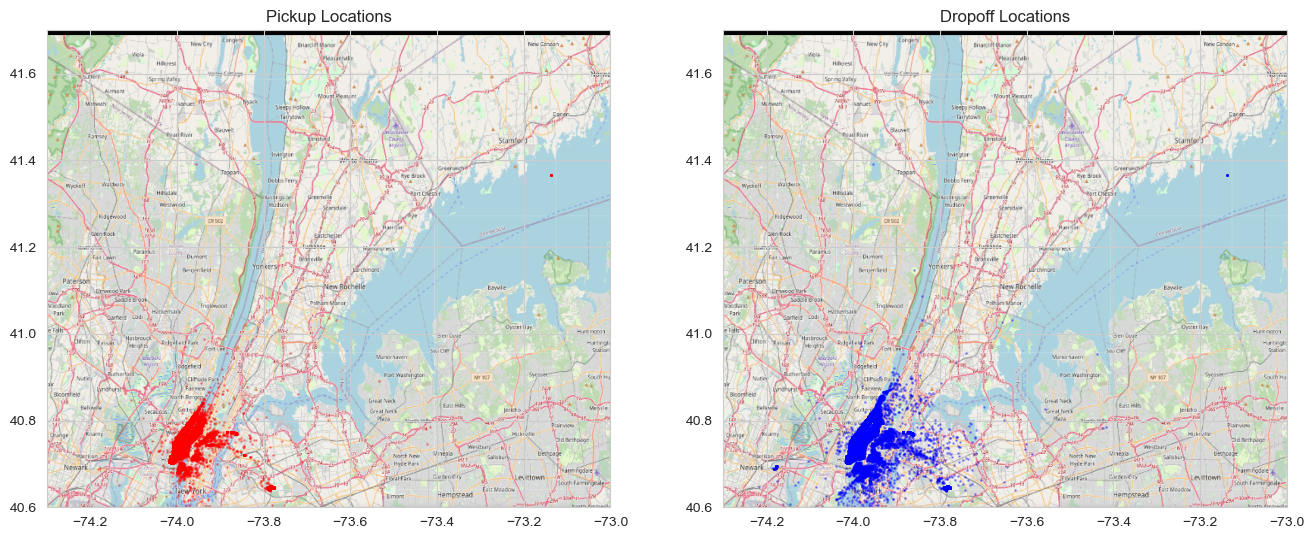

In [131]:
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

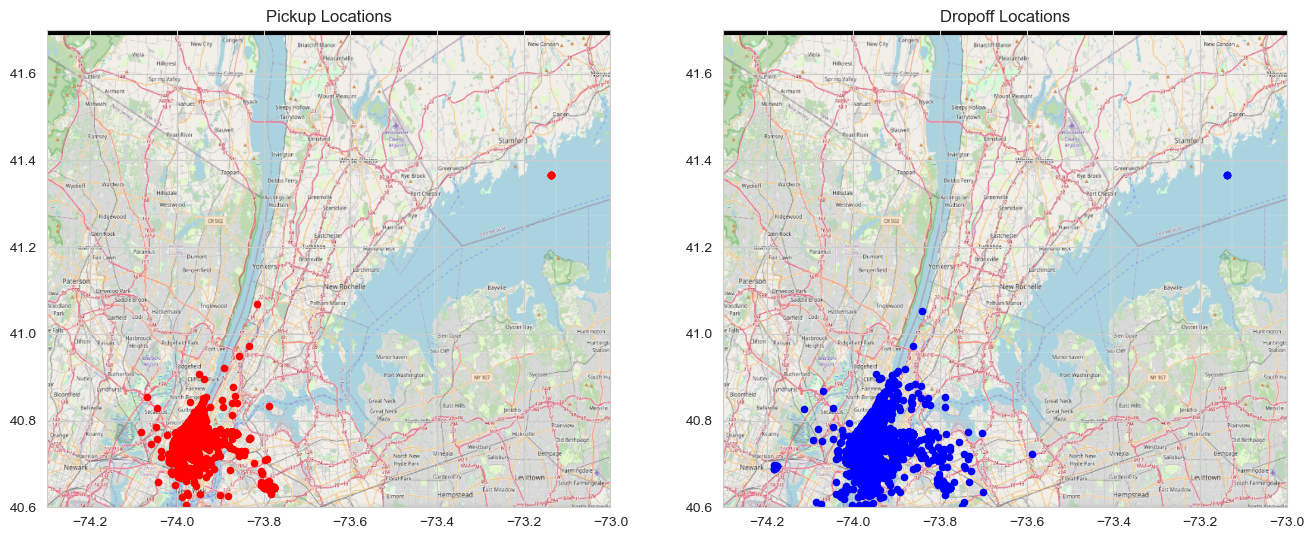

In [132]:
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

In [133]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].longitude_of_pickup, df[idx].latitude_of_pickup, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].longitude_of_dropoff, df[idx].latitude_of_dropoff, c=c[1], s=0.01, alpha=0.5)

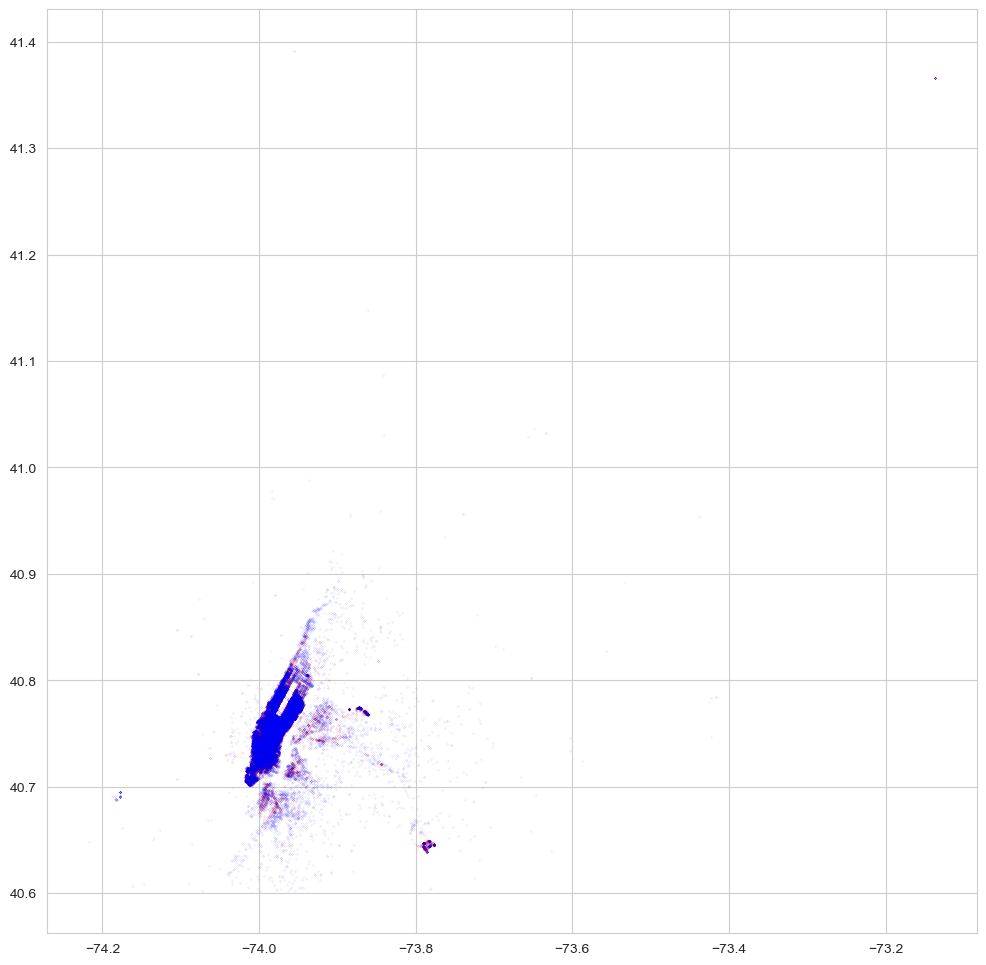

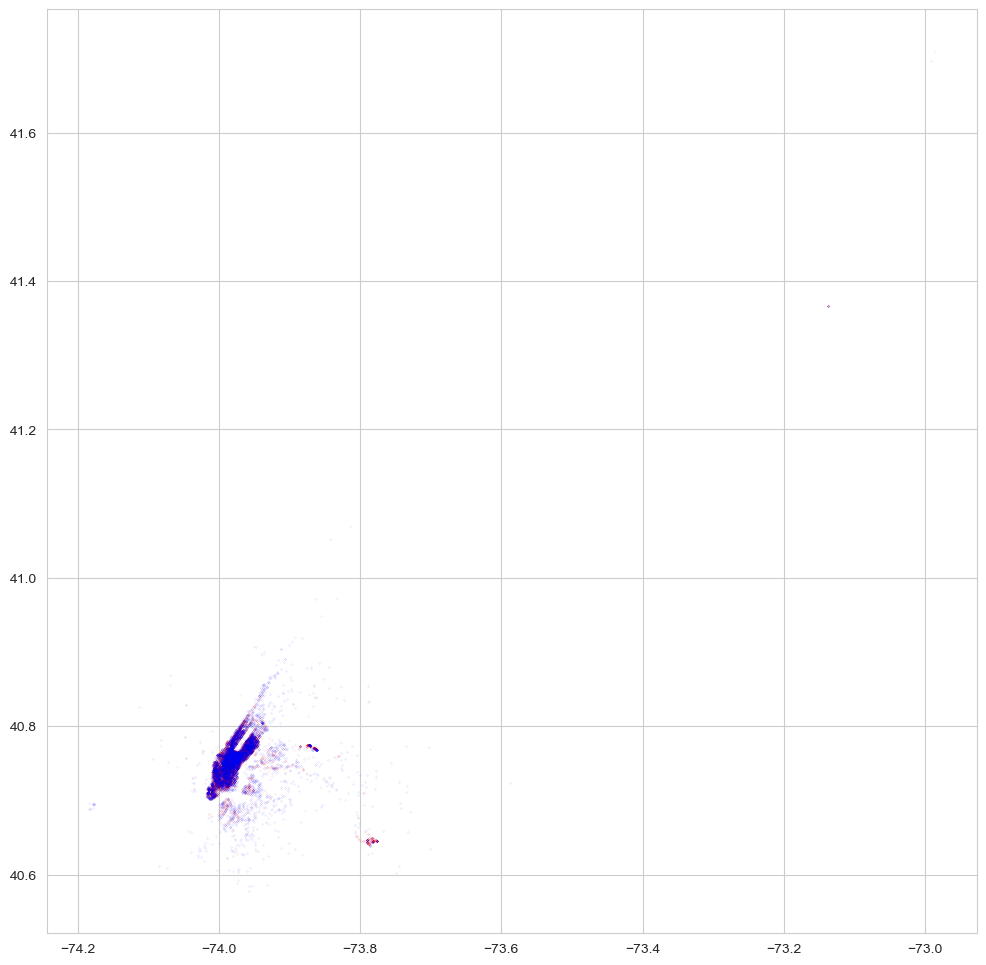

In [134]:
plot_hires(df_train, (-74.3, -73.1, 40.6, 41.65))
plot_hires(df_test, (-74.26, -72.98, 40.57, 41.71))

In [135]:
df_train['year'] = df_train["date_time_of_pickup"].apply(lambda t: t.year)
df_train['weekday'] = df_train["date_time_of_pickup"].apply(lambda t: t.weekday())
df_train['hour'] = df_train["date_time_of_pickup"].apply(lambda t: t.hour)

In [136]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [137]:
df_train["distance_miles"] = distance(df_train["latitude_of_pickup"], df_train["longitude_of_pickup"], 
                                      df_train["latitude_of_dropoff"], df_train["longitude_of_dropoff"])

In [138]:
df_train.head(2)

unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1   52:16.0    16.9 2010-01-05 16:52:16+00:00           -74.016048   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   

   no_of_passenger  year  weekday  hour  distance_miles  
0                1  2009        0    17        0.640487  
1                1  2010        1    16        5.250670

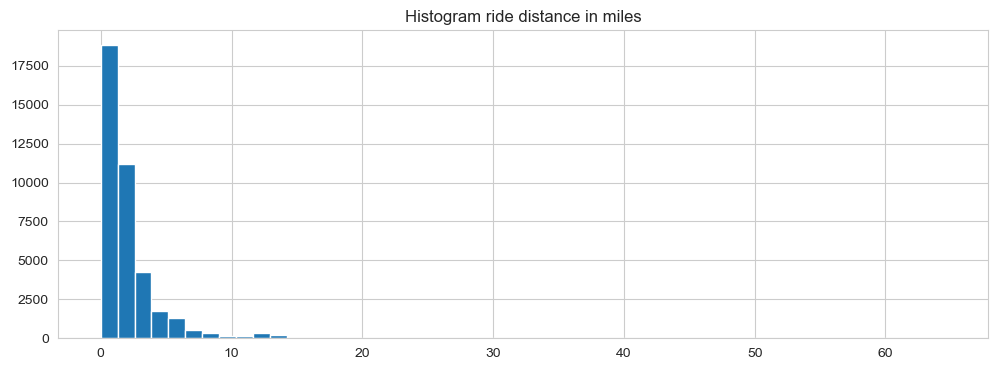

In [139]:
df_train["distance_miles"].hist(bins=50, figsize=(12,4))
plt.title("Histogram ride distance in miles");

In [140]:
df_train["distance_miles"].describe()

count    39117.000000
mean         2.078346
std          2.403534
min          0.000000
25%          0.785786
50%          1.344121
75%          2.436120
max         64.644331
Name: distance_miles, dtype: float64

In [141]:
df_train.groupby('no_of_passenger')['distance_miles','amount'].mean()

C:\Users\viraj_ppxqr08\AppData\Local\Temp\ipykernel_13232\3819866770.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby('no_of_passenger')['distance_miles','amount'].mean()


distance_miles     amount
no_of_passenger                           
0                      1.967105   9.668148
1                      2.042975  11.140059
2                      2.230179  12.083606
3                      2.021442  11.106453
4                      2.055944  11.361930
5                      2.116805  11.350464
6                      2.217329  12.439843

Text(0.5, 1.0, 'Zoom in on distance < 15 mile and fare < $100')

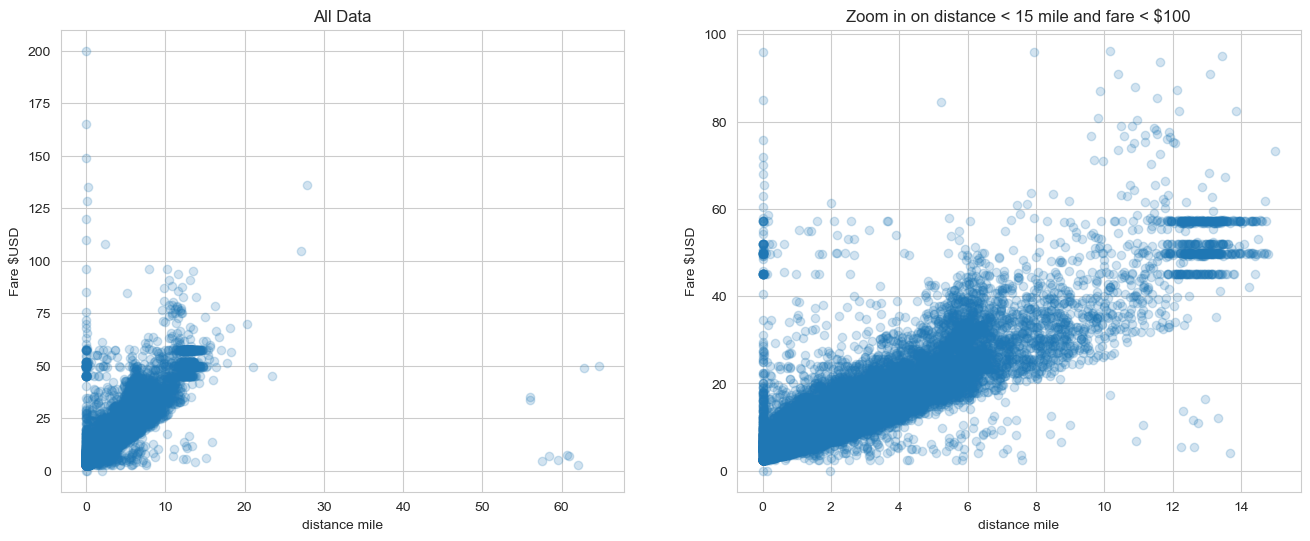

In [142]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df_train["distance_miles"], df_train["amount"], alpha=0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")


idx = ((df_train['distance_miles'] < 15) & (df_train["amount"] < 100))
axs[1].scatter(df_train[idx]["distance_miles"], df_train[idx]["amount"], alpha=0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15 mile and fare < $100")

In [143]:

idx = (df_train["distance_miles"] >= 0.05)
print('Old size: %d' % len(df_train))
df_train = df_train[idx]
print('New size: %d' % len(df_train))

Old size: 39117
New size: 38500


In [144]:
jfk = (-73.7822222222,40.6441666667)
nyc = (-74.0063889, 40.7141667)

In [145]:
def plot_location_fare(loc, name, range=1.5):
    
    fig, axs = plt.subplots(1,2, figsize=(14,5))
    idx = (distance(df_train["latitude_of_pickup"], df_train["longitude_of_pickup"], loc[1], loc[0]) < range)
    df_train[idx]["amount"].hist(bins = 100, ax=axs[0])
    axs[0].set_xlabel("Fare $USD")
    axs[0].set_title("Histogram pickup location within {} miles of {}".format(range, name))
    
    idx = (distance(df_train["latitude_of_dropoff"], df_train["longitude_of_dropoff"], loc[1], loc[0]) < range)
    df_train[idx]["amount"].hist(bins=100, ax=axs[1])
    axs[1].set_xlabel("Fare $USD")
    axs[1].set_title("Histogram dropoff location within {} miles of {}".format(range, name))

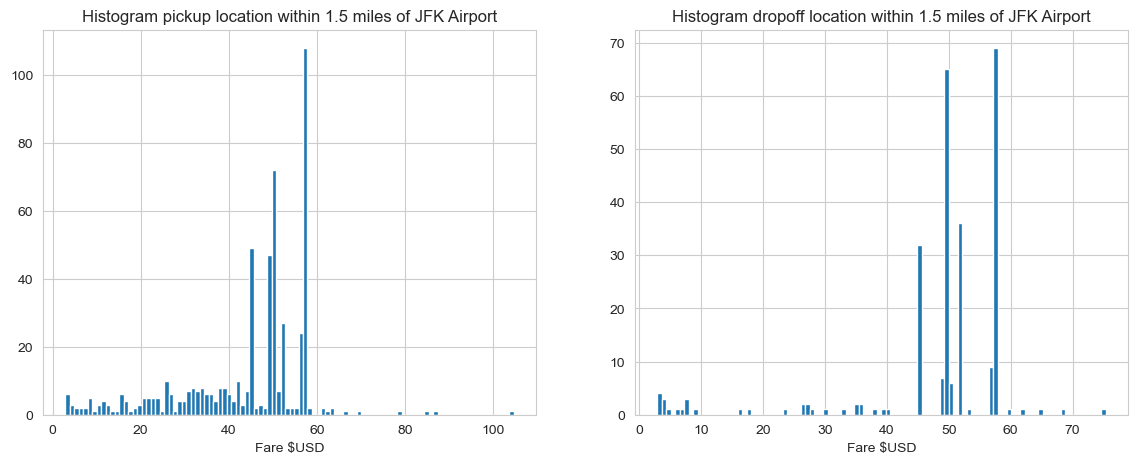

In [146]:
plot_location_fare(jfk, 'JFK Airport')

In [147]:

ewr = (-74.175, 40.69)
lgr = (-73.87, 40.77) 

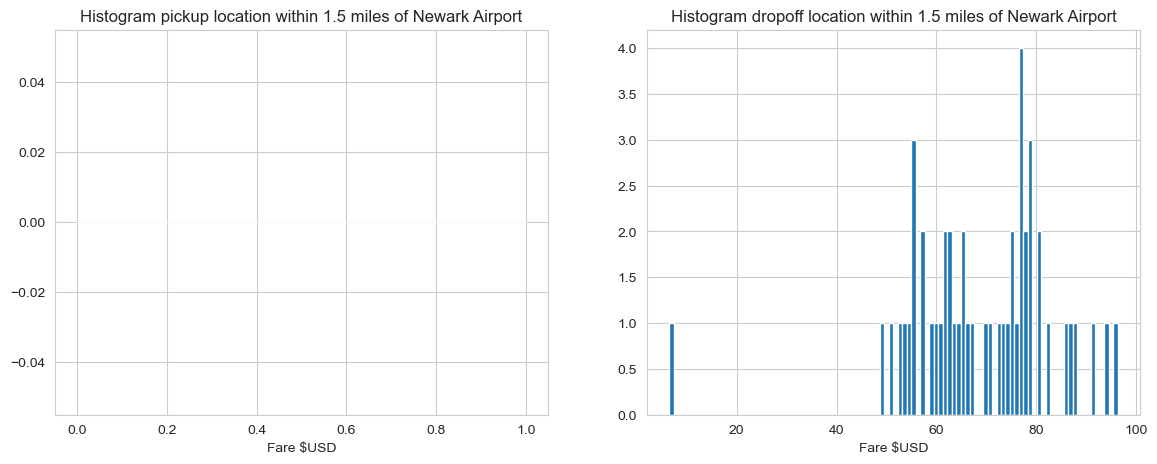

In [148]:
plot_location_fare(ewr, 'Newark Airport')

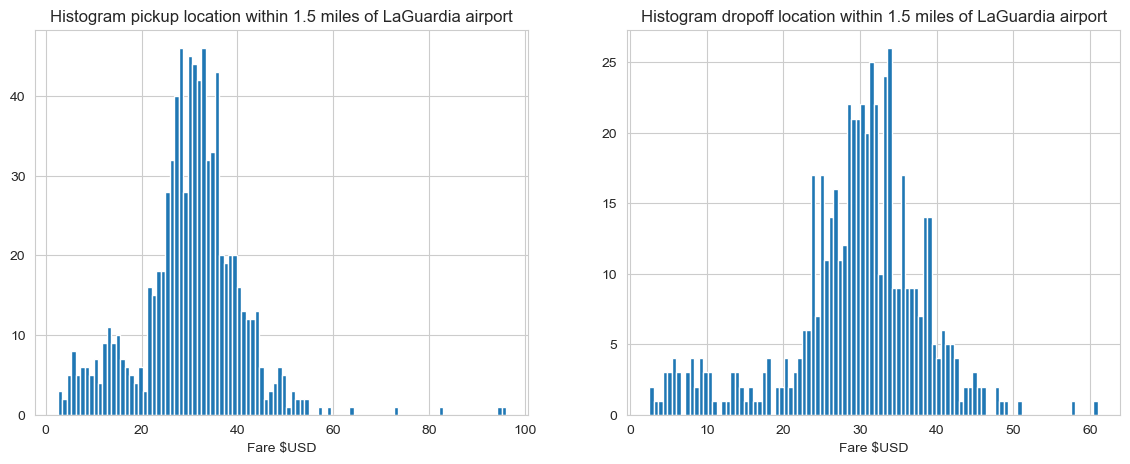

In [149]:
plot_location_fare(lgr, 'LaGuardia airport')

In [150]:
df_train["fare_per_mile"] = df_train["amount"] / df_train["distance_miles"]

In [151]:
df_train["fare_per_mile"].describe()

count    38500.000000
mean         7.465597
std         18.058149
min          0.000000
25%          4.760273
50%          6.116826
75%          8.057415
max       2555.639737
Name: fare_per_mile, dtype: float64

Text(0, 0.5, 'fare per distance in mile')

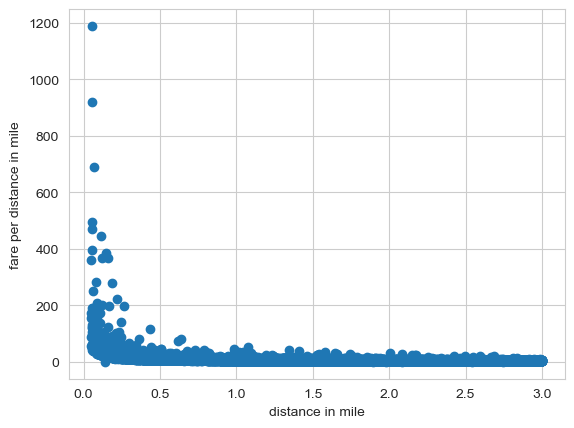

In [152]:
idx = (df_train["distance_miles"] < 3) & (df_train["amount"] < 100)
plt.scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_per_mile"])
plt.xlabel("distance in mile")
plt.ylabel("fare per distance in mile")

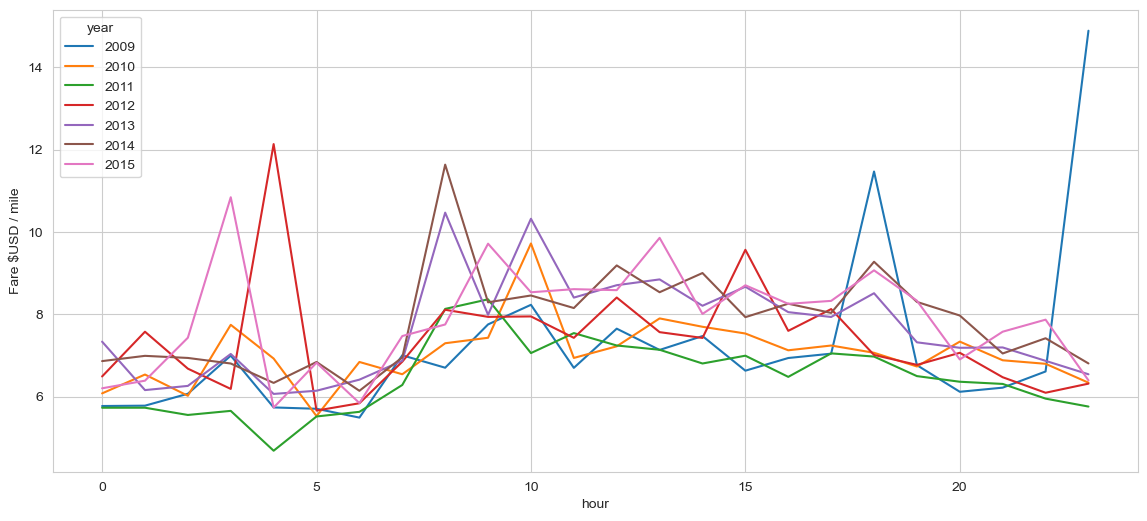

In [153]:
df_train.pivot_table("fare_per_mile", index="hour", columns="year").plot(figsize=(14,6))
plt.ylabel("Fare $USD / mile");

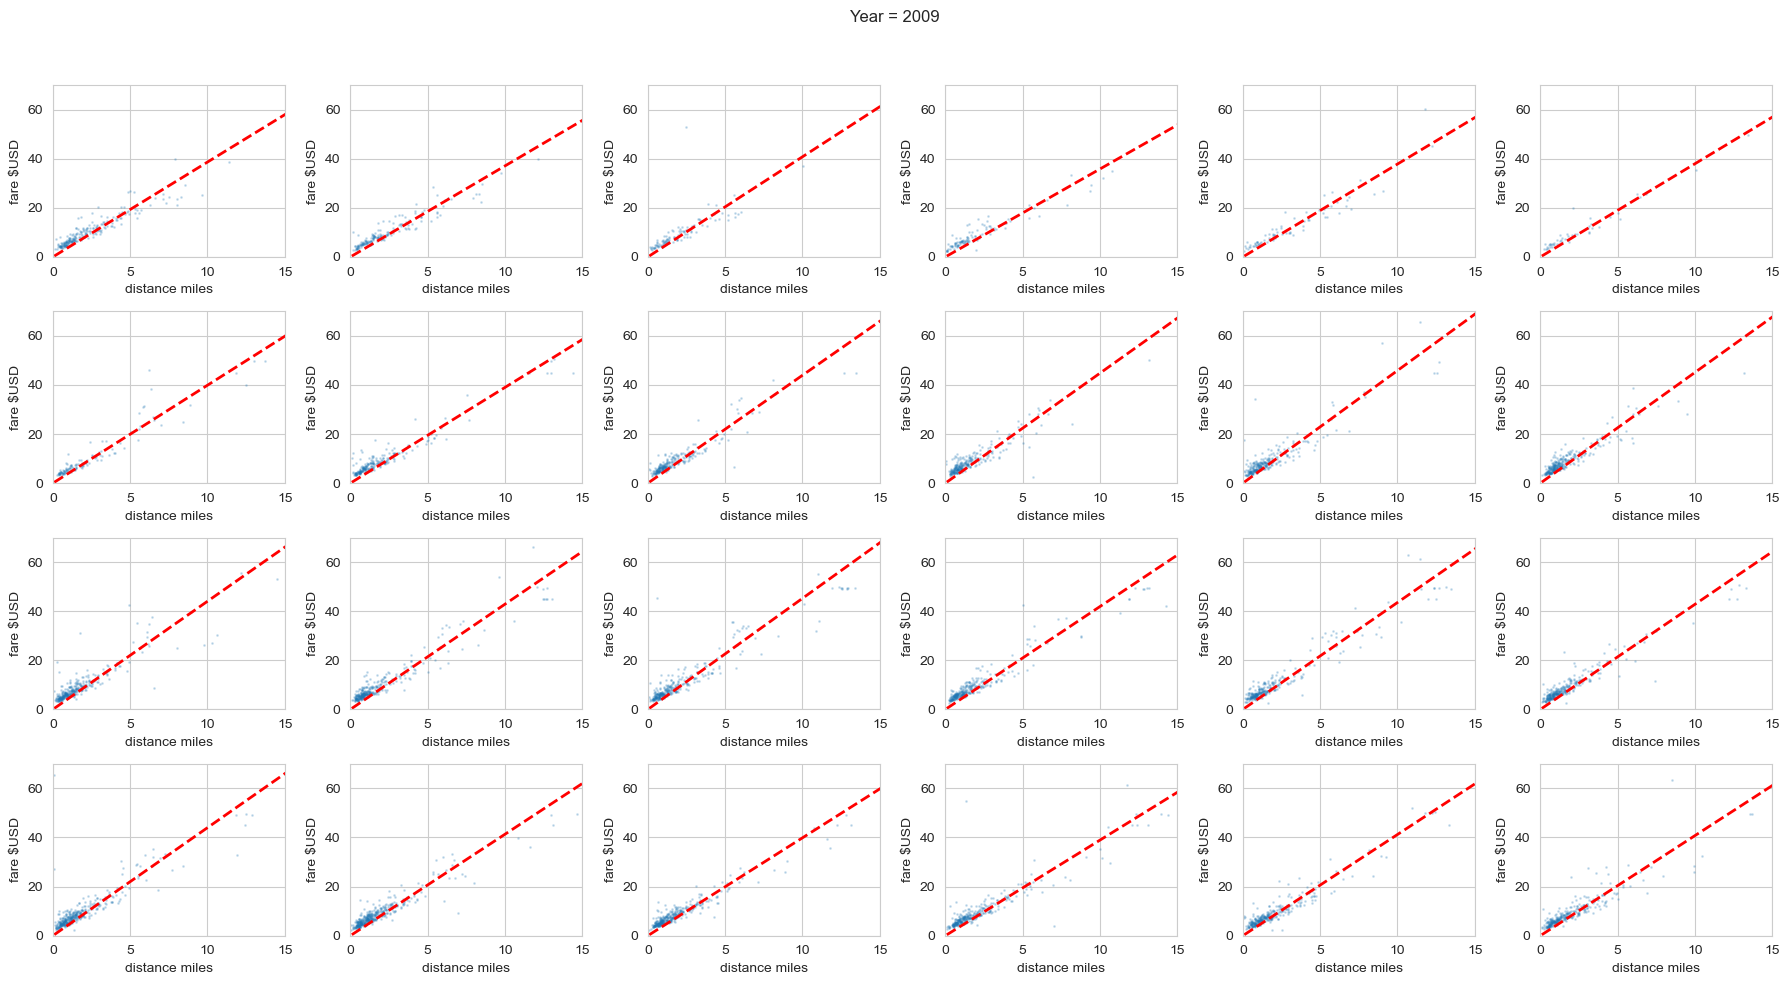

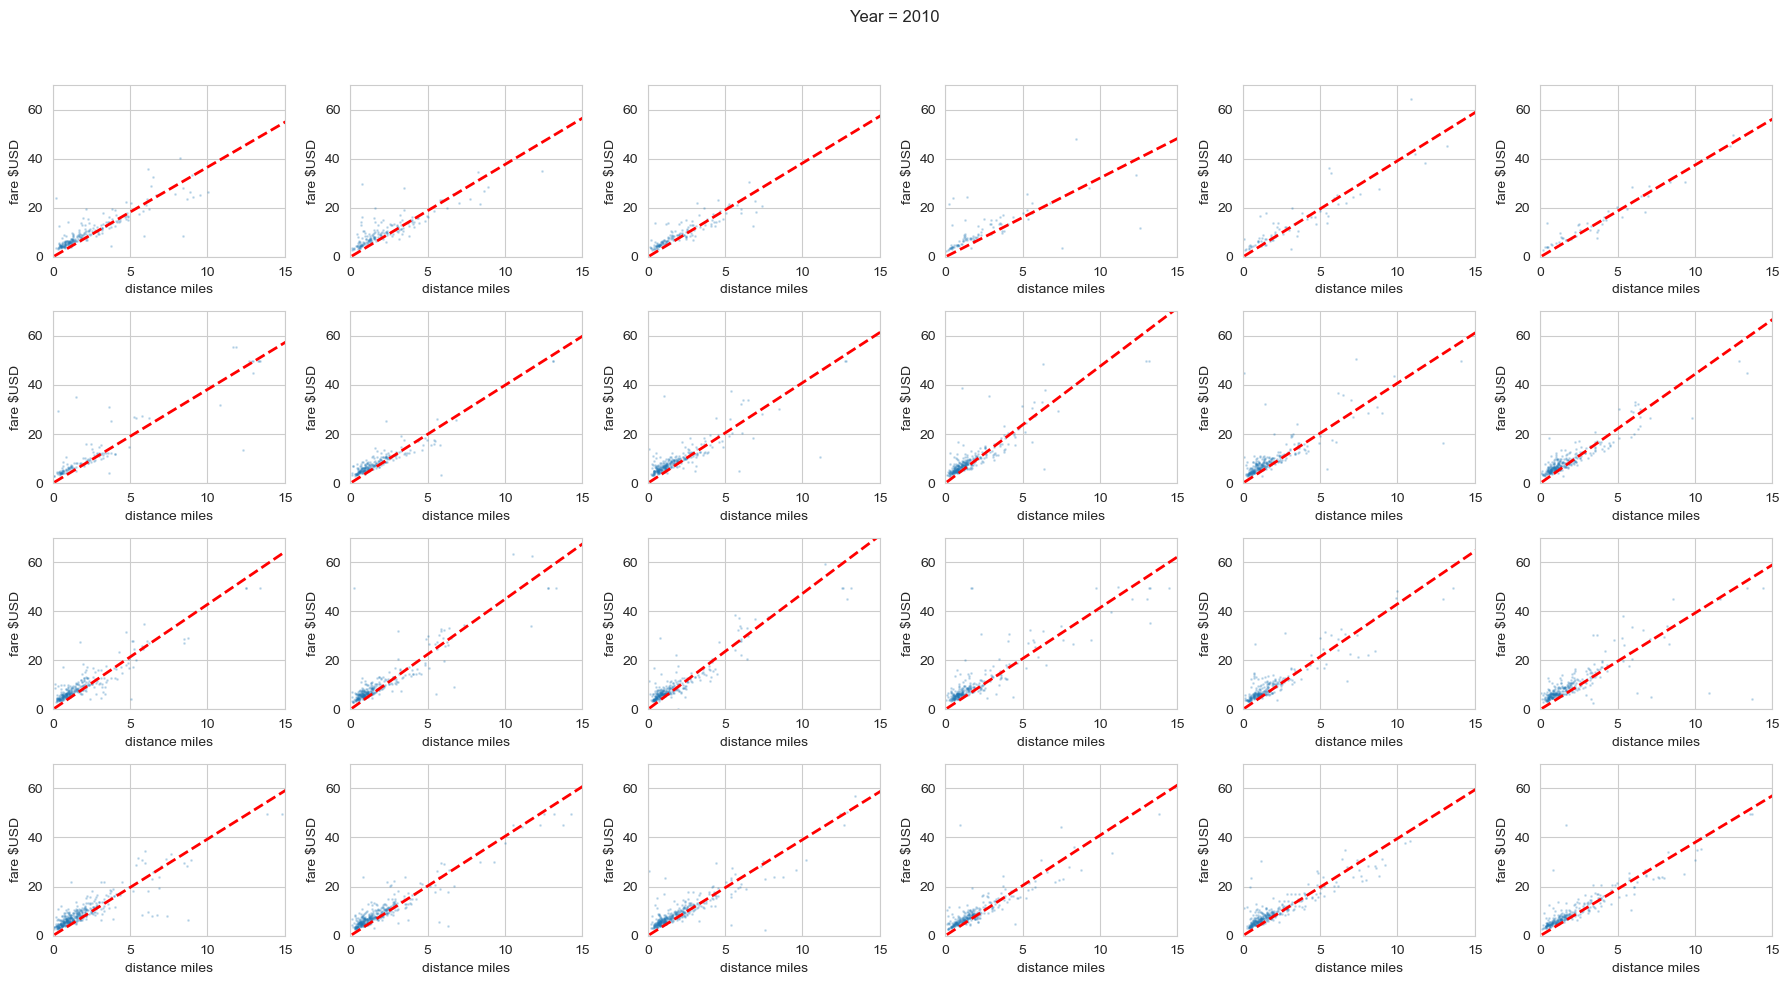

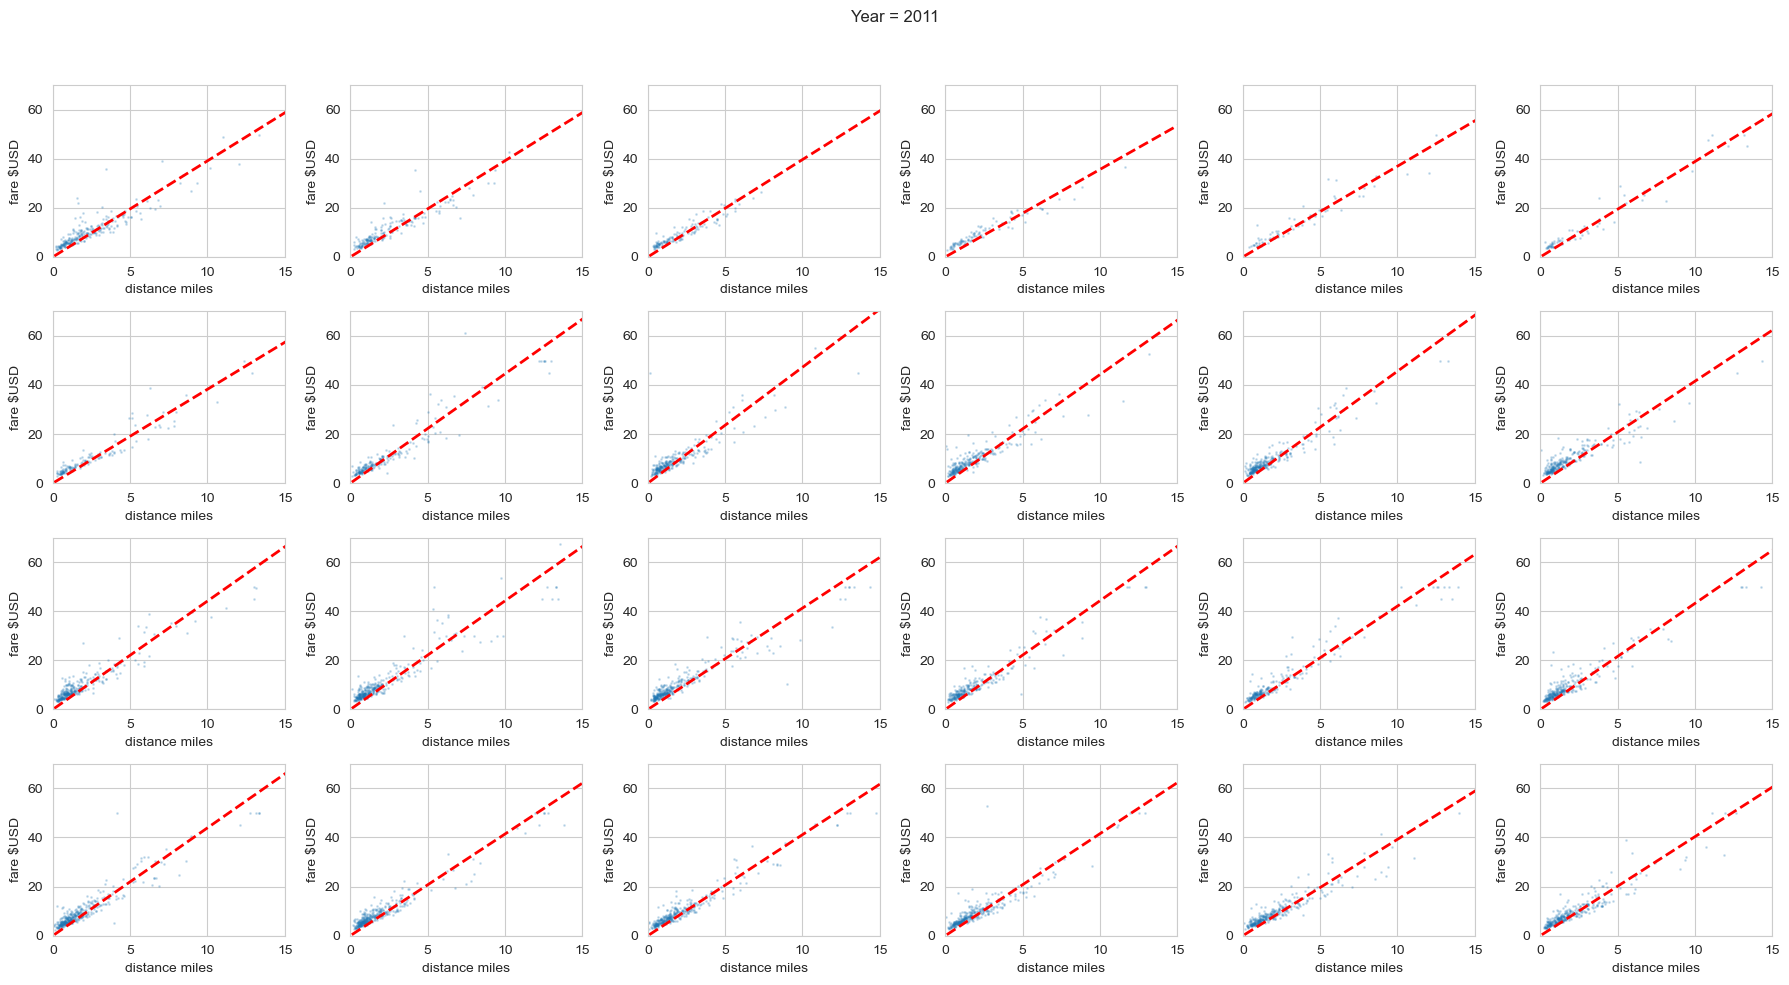

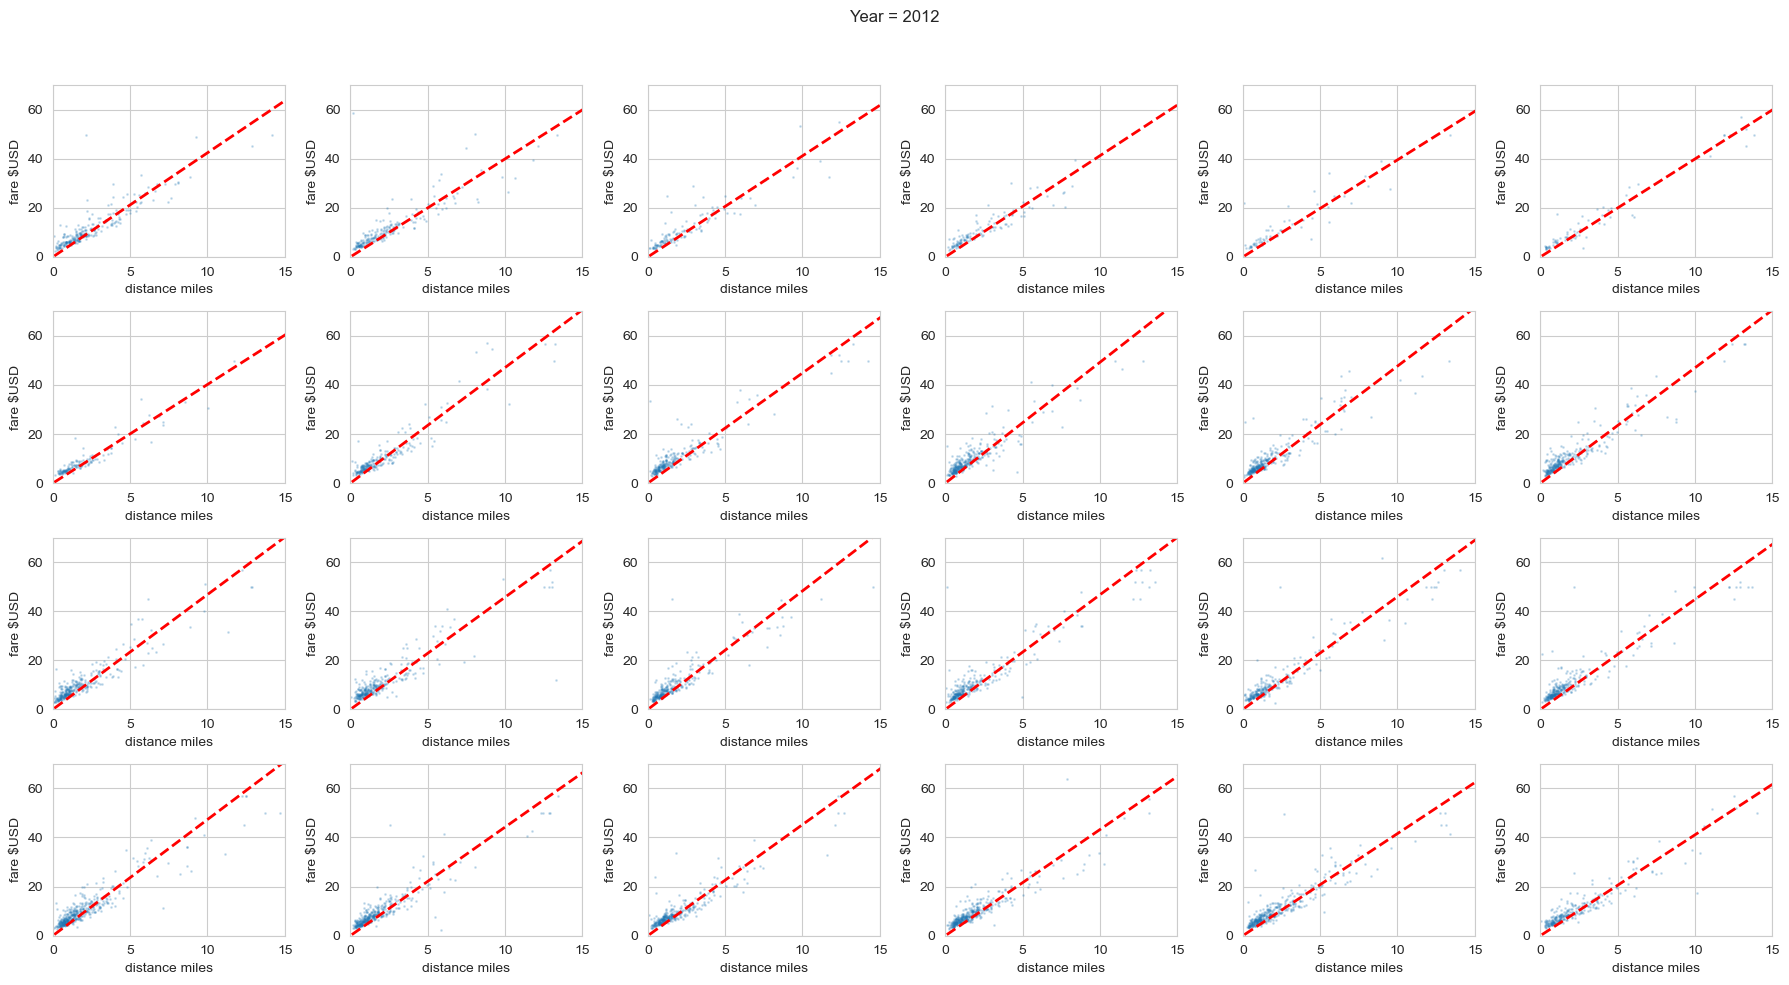

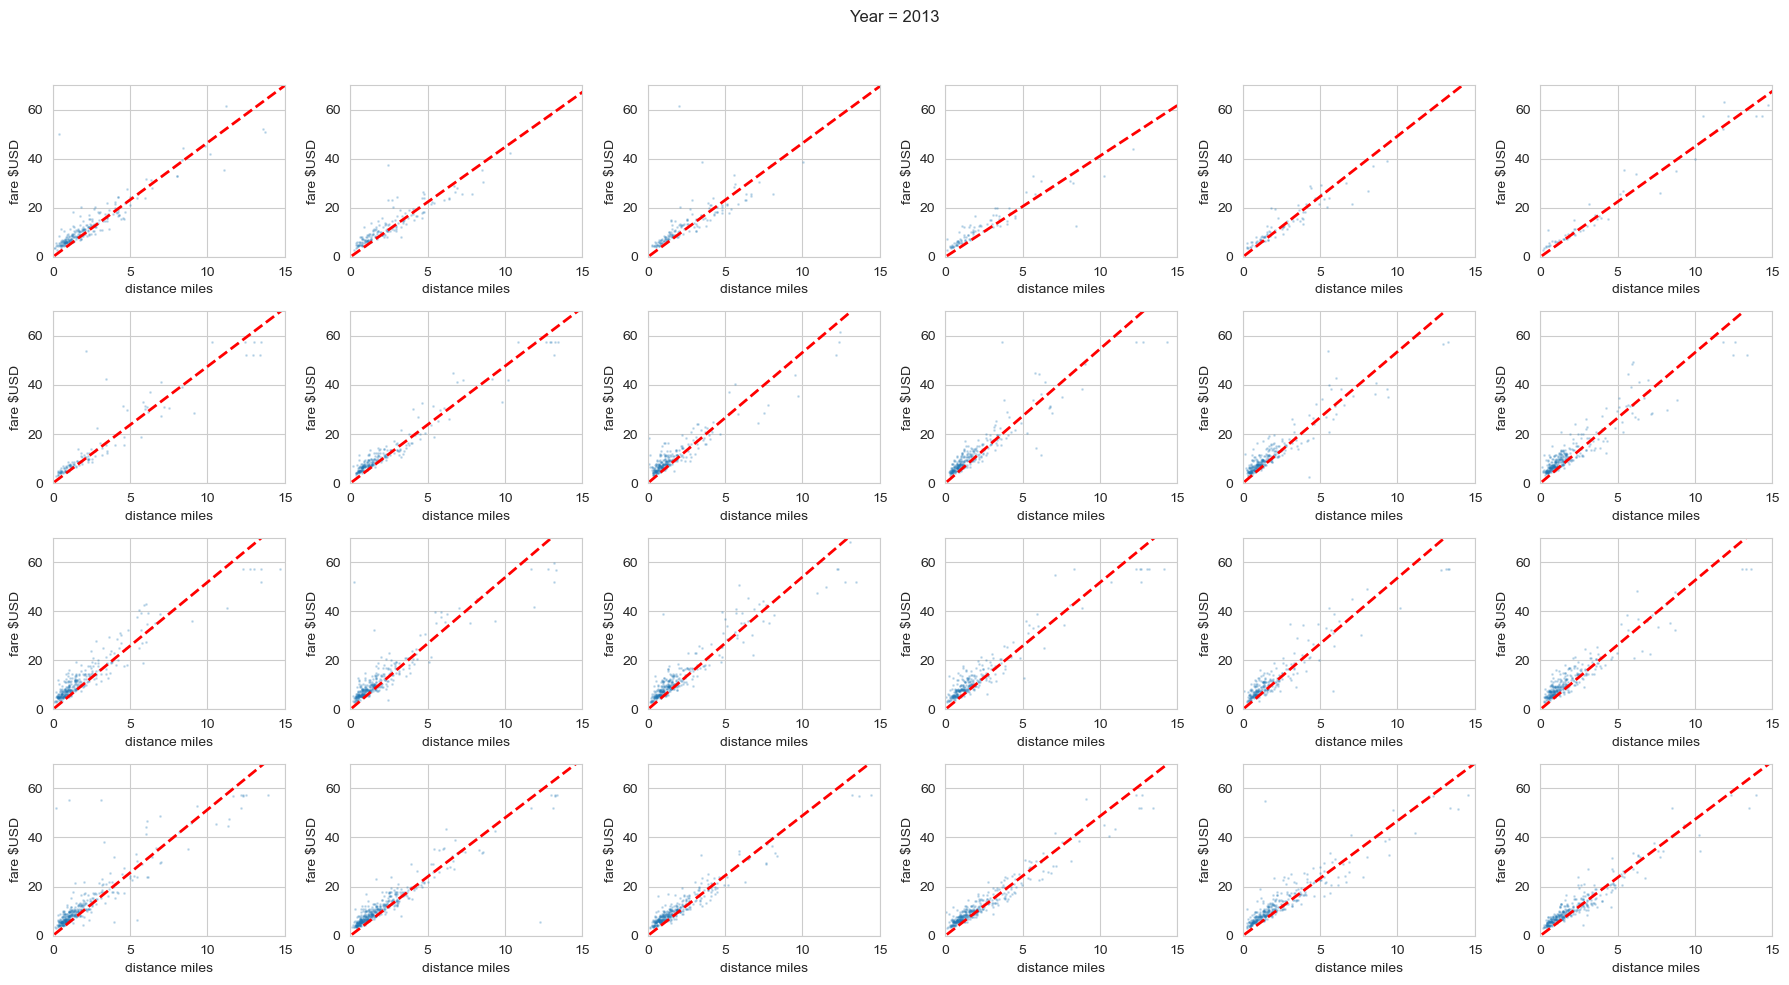

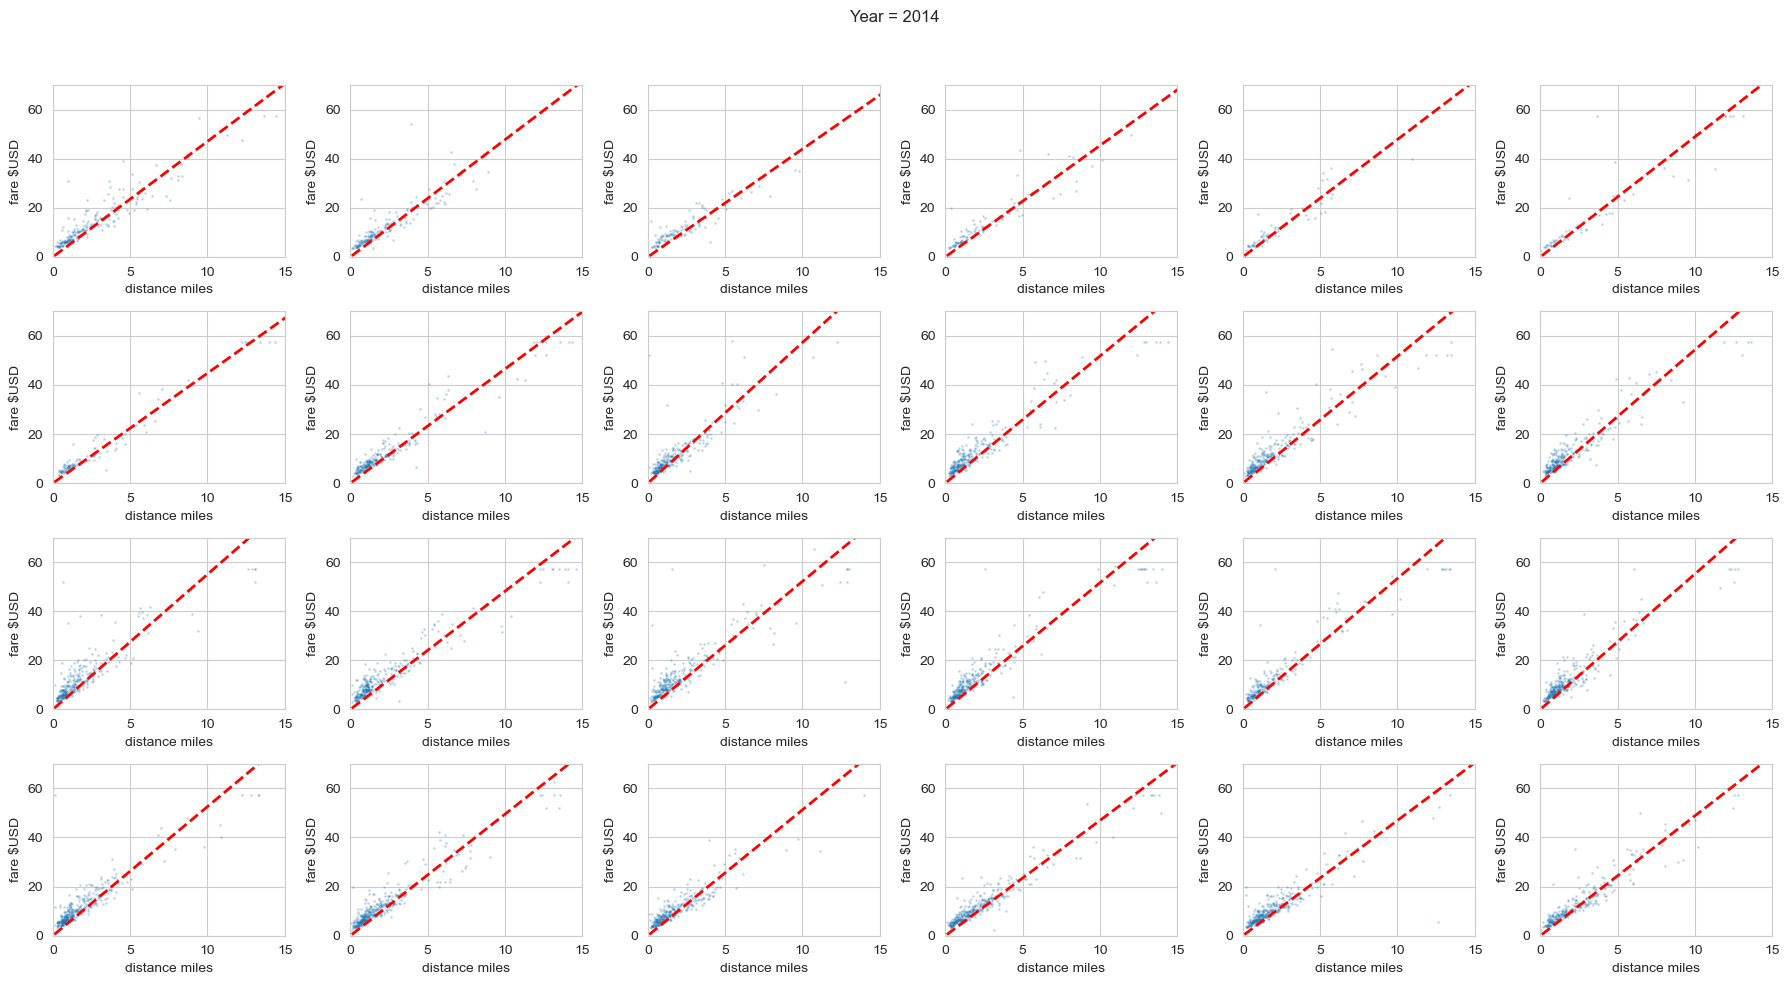

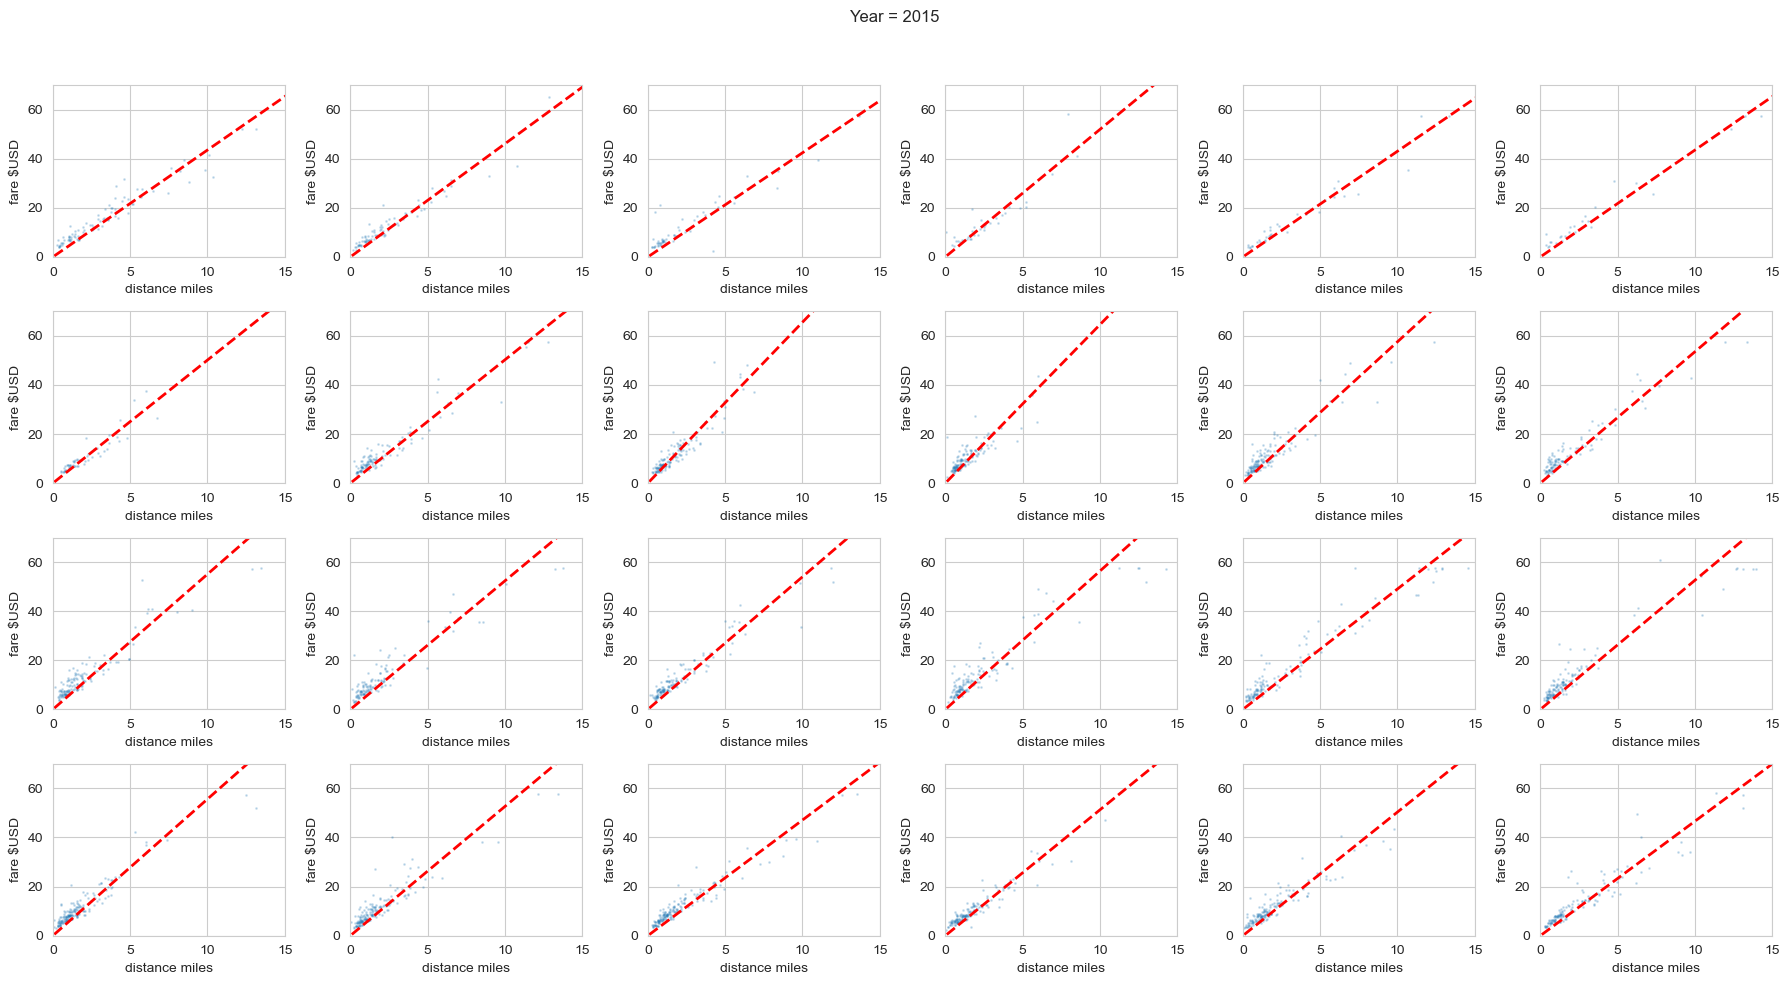

In [154]:
from sklearn.linear_model import LinearRegression


for year in df_train["year"].unique():
    
    
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()
    
    
    
    for h in range(24):
        idx = (df_train["distance_miles"] < 15) & (df_train["amount"] < 100) & (df_train["hour"] == h) & \
              (df_train["year"] == year)
        axs[h].scatter(df_train[idx]["distance_miles"], df_train[idx]["amount"], alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))
        
        model = LinearRegression(fit_intercept=False)
        
        X, y = df_train[idx]["distance_miles"].values.reshape(-1,1), df_train[idx]["amount"].values
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.predict(xx.reshape(-1,1)), '--', c='r', lw=2)
        
    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);

In [155]:
df_train["delta_lon"] = df_train["longitude_of_pickup"] - df_train["longitude_of_dropoff"]
df_train["delta_lat"] = df_train["latitude_of_pickup"] - df_train["latitude_of_dropoff"]

In [156]:
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)
idx_manhattan = select_within_boundingbox(df_train, BB_manhattan)

Text(0.5, 1.0, 'log1p(amount)')

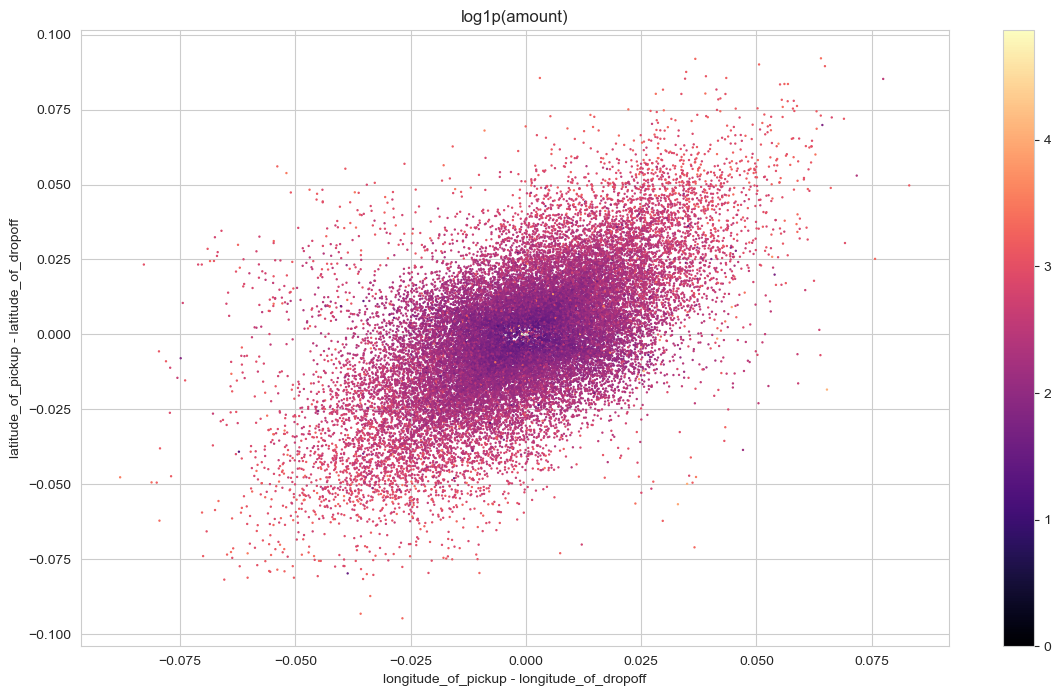

In [157]:
plt.figure(figsize=(14,8))
plt.scatter(df_train[idx_manhattan]["delta_lon"], df_train[idx_manhattan]["delta_lat"], s=0.5, alpha=1.0,
            c=np.log1p(df_train[idx_manhattan]["amount"]), cmap="magma")
plt.colorbar()
plt.xlabel('longitude_of_pickup - longitude_of_dropoff')
plt.ylabel('latitude_of_pickup - latitude_of_dropoff')
plt.title('log1p(amount)')

In [158]:
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

In [159]:
df_train['direction'] = calculate_direction(df_train.delta_lon, df_train.delta_lat)

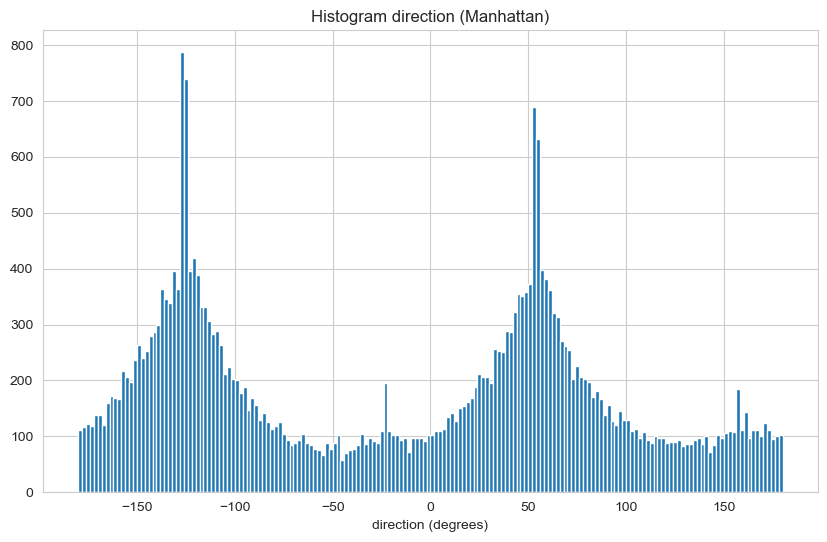

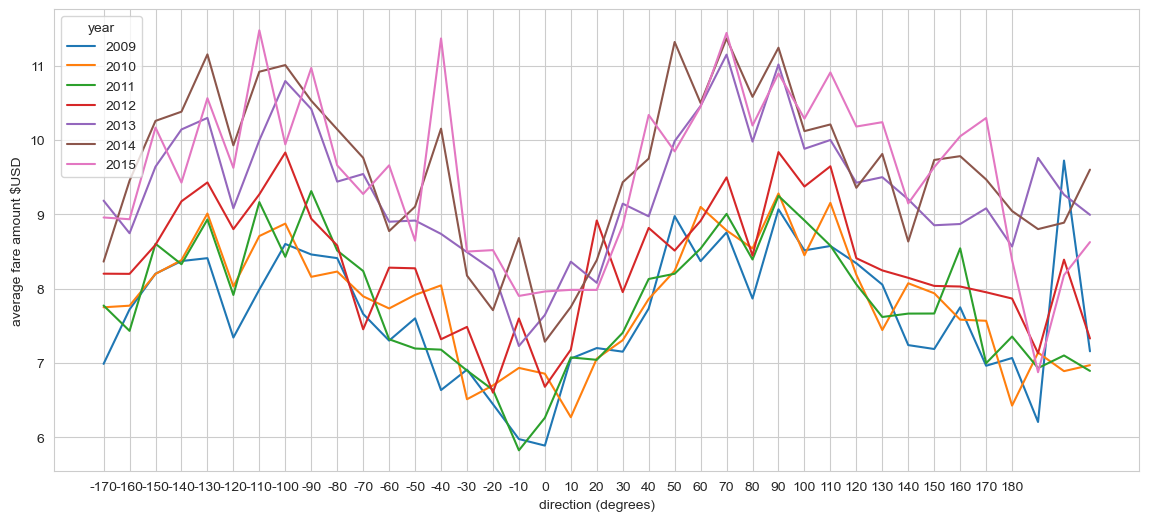

In [160]:
plt.figure(figsize=(10,6))
df_train[idx_manhattan].direction.hist(bins=180)
plt.xlabel('direction (degrees)')
plt.title('Histogram direction (Manhattan)')


fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(df_train[idx_manhattan]['direction'], np.linspace(-180, 180, 40))

df_train[idx_manhattan].pivot_table('amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)

plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

In [161]:
df_train['distance_to_center'] = distance(nyc[1], nyc[0], df_train["latitude_of_pickup"], df_train["longitude_of_pickup"])

In [162]:
df_train.head()

unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1   52:16.0    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2   35:00.0     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3   30:42.0     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4   51:00.0     5.3 2010-03-09 07:51:00+00:00           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.640487       7.025903   
1                1  2010        1    16        5.250670       3.218637   
2                2  2011        3     0        0.863411       6.601723   
3                1  2012        5     4        1.739386       4.426850   
4                1  2010        1     7        1.242218       4.266560   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

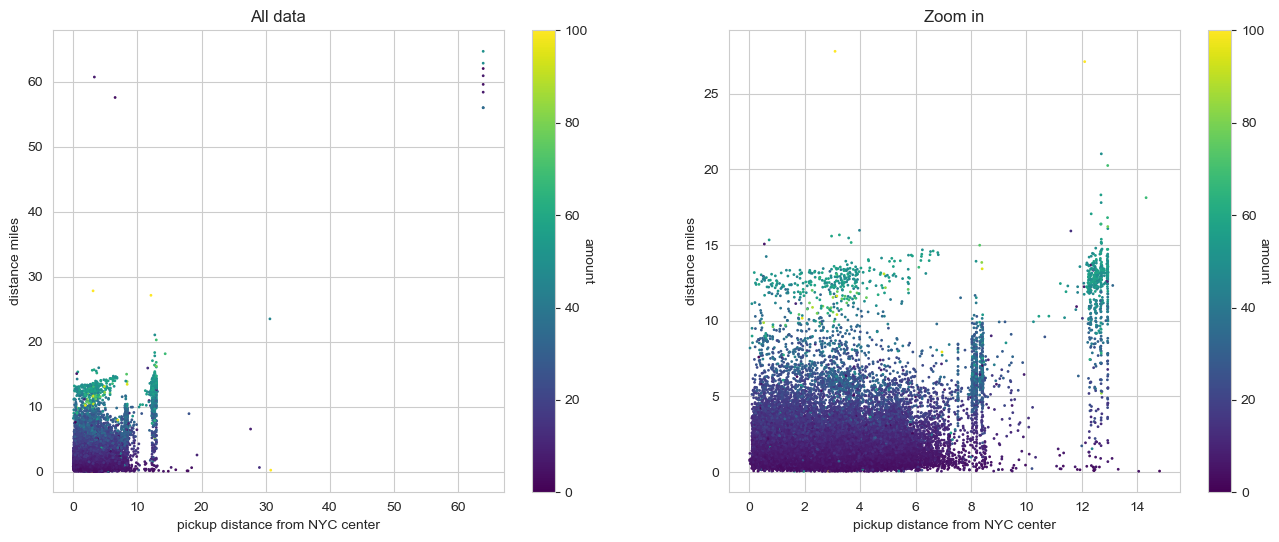

In [163]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train["distance_to_center"], df_train["distance_miles"], c=np.clip(df_train["amount"], 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)

axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')

cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('amount', rotation=270)


idx = (df_train["distance_to_center"] < 15) & (df_train["distance_miles"] < 35)
im = axs[1].scatter(df_train[idx]["distance_to_center"], df_train[idx]["distance_miles"], 
                     c=np.clip(df_train[idx]["amount"], 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('amount', rotation=270);

In [164]:
df_test['distance_miles'] = distance(df_test["latitude_of_pickup"], df_test["longitude_of_pickup"], 
                                     df_test["latitude_of_dropoff"], df_test["longitude_of_dropoff"])
df_test['distance_to_center'] = distance(nyc[1], nyc[0], df_test["latitude_of_dropoff"], df_test["longitude_of_dropoff"])
df_test['hour'] = df_test["date_time_of_pickup"].apply(lambda t: pd.to_datetime(t).hour)
df_test['year'] = df_test["date_time_of_pickup"].apply(lambda t: pd.to_datetime(t).year)
df_test['weekday'] = df_test["date_time_of_pickup"].apply(lambda t: pd.to_datetime(t).weekday())

In [165]:
df_train.head()

unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1   52:16.0    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2   35:00.0     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3   30:42.0     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4   51:00.0     5.3 2010-03-09 07:51:00+00:00           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.640487       7.025903   
1                1  2010        1    16        5.250670       3.218637   
2                2  2011        3     0        0.863411       6.601723   
3                1  2012        5     4        1.739386       4.426850   
4                1  2010        1     7        1.242218       4.266560   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

In [166]:
df_test.head()

unique_id      date_time_of_pickup  longitude_of_pickup  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC           -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC           -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC           -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC           -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC           -73.966046   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.763805            -73.981430            40.743835   
1           40.719383            -73.998886            40.739201   
2           40.751260            -73.979654            40.746139   
3           40.767807            -73.990448            40.751635   
4           40.789775            -73.988565            40.744427   

   no_of_passenger  distance_miles  distance_to_center  hour  year  weekday  
0                1        1.443607            2.431036    13  2015        1  
1                1        1.507044            1.773728    13  2015        1  
2                1        0.384398            2.615229    11  2011        5  
3                1        1.218529            2.720018    21  2012        5  
4                1        3.347514            2.289611    21  2012        5

In [167]:
idx = (df_train["distance_to_center"] < 15) & (df_train["no_of_passenger"] != 0)

features = ['year', 'hour', 'distance_miles', 'no_of_passenger','weekday','distance_to_center']

X = df_train[idx][features].values
y = df_train[idx]['amount'].values

In [168]:
print(X.shape, y.shape)

(38347, 6) (38347,)


In [169]:
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

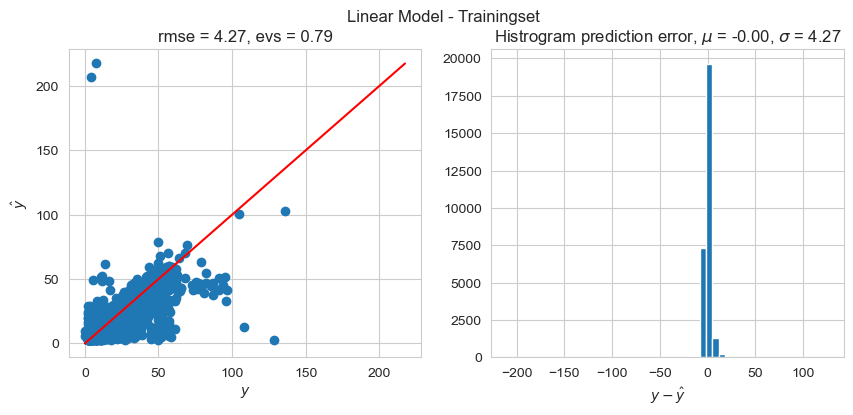

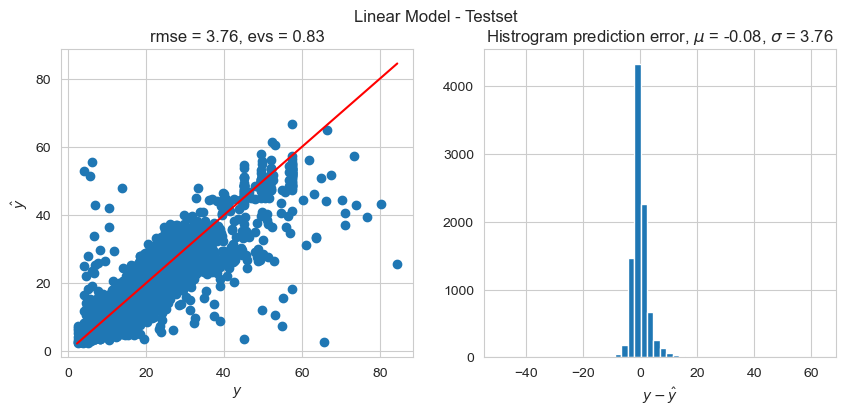

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

In [172]:
XTEST = df_test[features].values

In [173]:
y_pred_final = model_lin.predict(XTEST)

submission = pd.DataFrame(
    {
        'unique_id': df_test["unique_id"], 
        'amount': y_pred_final
    },
    columns = ['unique_id', 'amount'])
submission.to_csv(r"D:\texi fare predictions\sample_submission.csv", index = False)

In [174]:
submission.head(10)

unique_id     amount
0  2015-01-27 13:08:24.0000002  10.632742
1  2015-01-27 13:08:24.0000003  10.758318
2  2011-10-08 11:53:44.0000002   4.541205
3  2012-12-01 21:12:12.0000002   8.133900
4  2012-12-01 21:12:12.0000003  15.606315
5  2012-12-01 21:12:12.0000005  10.843769
6  2011-10-06 12:10:20.0000001   5.651133
7  2011-10-06 12:10:20.0000003  50.794418
8  2011-10-06 12:10:20.0000002  11.728884
9  2014-02-18 15:22:20.0000002   7.685838